# **Pred2Town - Version 1.1 - Git**

This thesis, entitled "Homicide Prediction: The Impact of Imbalance Correction on Neural Network Performance", is a derived and extended version of the research "Prediction of Homicides in Urban Centers: A Machine Learning Approach", originally presented at IntelliSys 2021. The original work and source code are available at: https://github.com/josesousaribeiro/Pred2Town.

This updated version explores additional methodologies, particularly focusing on the impact of data imbalance correction techniques on neural network performance.

# **Analyzes**

## - Libs:

In [31]:
!pip install shap
!pip install eli5
!pip install lime
!pip install venn
!pip install scikit_posthocs
!pip install catboost



from scipy.stats import friedmanchisquare
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from folium.features import DivIcon

from decimal import Decimal 


from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from matplotlib.pyplot import subplots
from venn import venn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
import shap
import eli5
import lime 
import lime.lime_tabular 
import pandas as pd
import csv
import io
import numpy as np
import seaborn as sns; sns.set()
import scikit_posthocs as sp
import pickle
import pandas as pd
import folium

import math
import matplotlib.pyplot as plt

import lightgbm as lgb
import catboost as cb






[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

## Global params to execution:

In [32]:
import pandas as pd

name_dataset = 'dataset_pred2town_bel.csv'
name_target_class = 'Class'

dt = {'info_gain_ent':[],
        'feat_imp_oob':[],
        'shap_rf':[],
        'shap_xgb':[],
        'shap_gb':[],
        'shap_dt':[],
        'eli5_rf':[],
        'eli5_xgb':[],
        'eli5_gb':[],
        'eli5_dt':[]}

df_Pred2Town_feature_rank = pd.DataFrame(dt)


# If false, upload the templates to the google colab path in order to locate each model to be reused.
# If true, grid search will be performed and new best models will be located automatically.
run_grid_search_cb = False
run_grid_search_lgbm = False
run_grid_search_rf = False
run_grid_search_xgb = False
run_grid_search_gb = False
run_grid_search_lr = False
run_grid_search_dt = False
run_grid_search_knn = False
run_grid_search_nb = False
run_grid_search_nn = False
run_grid_search_svm = False


cv_grid_search = 7 
crossvalidation = 7



## - Import dataset: dataset_pred2town_bel.csv


In [33]:
import pandas as pd

# Replace with your local file path
file_path = "dataset_pred2town_bel.csv"  # Ensure the file is in the same directory as your script
df = pd.read_csv(file_path, encoding="UTF-8", sep=";")


In [8]:
df

,mes_num_crb,quant_lesao_corporal_crb,quant_ameaca_crb,quant_roubo_crb,quant_injuria_crb,quant_furto_crb,quant_lesao_no_transito_crb,quant_dano_no_transito_crb,quant_difamacao_crb,quant_homicidio_crb,...,quant_receptacao_crb,quant_estupro_crb,quant_desaparecimento_de_pessoa_crb,quant_tentativa_de_homicidio_crb,quant_poluicao_sonora_crb,quant_outras_fraudes_crb,quant_desobediencia_crb,quant_desacato_crb,quant_perturbacoes_da_tranquilidade_crb,Class
0,1.0,0.000000,0.048193,0.002433,0.00000,0.020619,0.000000,0.000000,0.000000,0.071429,...,0.166667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
1,1.0,0.081633,0.084337,0.124088,0.03125,0.036082,0.233333,0.000000,0.000000,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,1
2,1.0,0.000000,0.132530,0.063260,0.03125,0.018041,0.066667,0.027027,0.000000,0.000000,...,0.000000,0.0,0.2,0.0,0.000000,0.0,0.166667,0.0,0.125,1
3,1.0,0.183673,0.168675,0.141119,0.06250,0.126289,0.100000,0.027027,0.000000,0.000000,...,0.000000,0.0,0.4,0.0,0.000000,0.0,0.166667,0.4,0.125,0
4,1.0,0.040816,0.012048,0.017032,0.00000,0.038660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,12.0,0.306122,0.289157,0.141119,0.15625,0.118557,0.100000,0.060811,0.166667,0.071429,...,0.000000,0.0,0.2,0.2,0.000000,0.0,0.000000,0.0,0.000,0
2000,12.0,0.183673,0.277108,0.192214,0.28125,0.381443,0.366667,0.506757,0.222222,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000,0
2001,12.0,0.040816,0.012048,0.043796,0.00000,0.015464,0.000000,0.047297,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
2002,12.0,0.040816,0.060241,0.075426,0.06250,0.090206,0.066667,0.243243,0.166667,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0



## - Split de Train/Test

In [34]:
import numpy as np

np.random.seed(0)
# Set target value and others features.
y_feature_name = name_target_class

Y = (df[y_feature_name].astype(int))

x_features_names = list(df.head(0))
x_features_names.remove(name_target_class)
X =  df[x_features_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # 70% training and 30% testing




In [35]:


# Save files locally (no download prompt)
X_train.to_csv("X_train.csv", index=False)  # Avoid saving row indices
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Files saved to your current working directory!")


Files saved to your current working directory!


### Class stratification

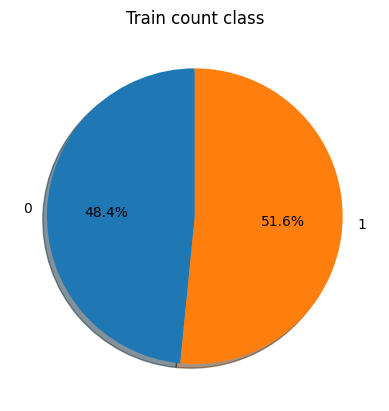

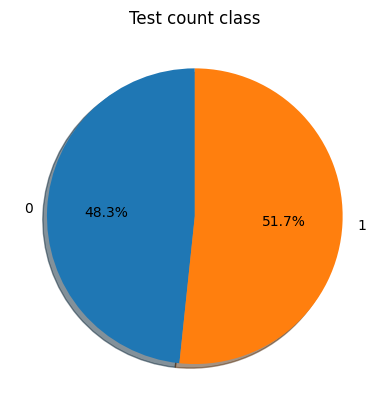

In [15]:
import matplotlib.pyplot as plt

title = 'Train count class'
labels = [0,1]
sizesTrain = [y_train.to_list().count(0), y_train.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTrain, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

title = 'Test count class'
labels = [0,1]
sizesTest = [y_test.to_list().count(0), y_test.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTest, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

In [62]:
print(df[y_feature_name].to_list().count(0))
print(df[y_feature_name].to_list().count(1))

970
1034


## - Train, test and algorithm analysis

### Random Forest - Create a GridSearch to identify the best classify

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pickle

filename = 'best_model_rf.sav'
run_grid_search_rf = True
if run_grid_search_rf == True:
  # Create the parameter grid based on the results of random search 
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  param_grid = {
    'max_depth': [1,6,12],  # Test only one value for max_depth
    'bootstrap': [True],  # Test only True for bootstrap
    'n_estimators': [10,100,200],  # Test with only 100 trees
    'min_samples_leaf': [1, 10, 20, 40],
    'ccp_alpha': [0.0,0.4],  # Test with no pruning
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
  }


  # Create a based model
  model_rf = RandomForestClassifier()
  # Instantiate the grid search model
  #https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
  grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  
  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  
  grid_search.best_params_

  model_rf = grid_search.best_estimator_
  #save
  pickle.dump(model_rf, open(filename, 'wb'))
  
else: 
  #load
  model_rf = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_rf)
y_pred_rf = model_rf.predict(X_test)


Fitting 7 folds for each of 288 candidates, totalling 2016 fits
[CV] END bootstrap=True, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50,), n_estimators=10; total time=   1.7s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min

RF - Accuracy, precision and Recall

In [49]:
y_pred = y_pred_rf
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)],
    'F1 score': [f1_score(y_test, y_pred)],
     'roc_auc':[roc_auc_score(y_test, y_pred)]
    }
dataframe_analisys = pd.DataFrame(data=d)

dataframe_analisys

,Accuracy,Precision,Recall,F1 score,roc_auc
0,0.755814,0.767974,0.755627,0.76175,0.75582


RF - Confusio matrix

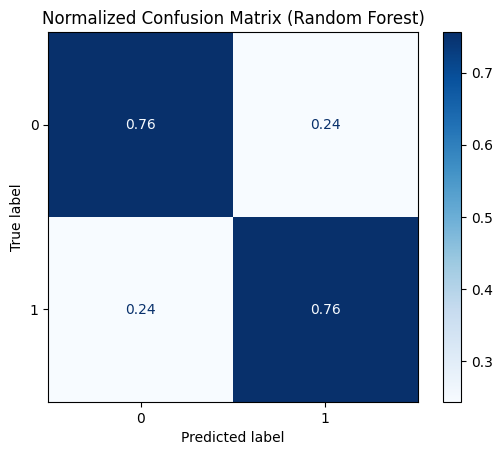

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model_rf,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


RF - Statistical analysis

/var/folders/ct/z0hnrbgs2k3ckyk5nyw8n03w0000gn/T/ipykernel_19140/2797378004.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


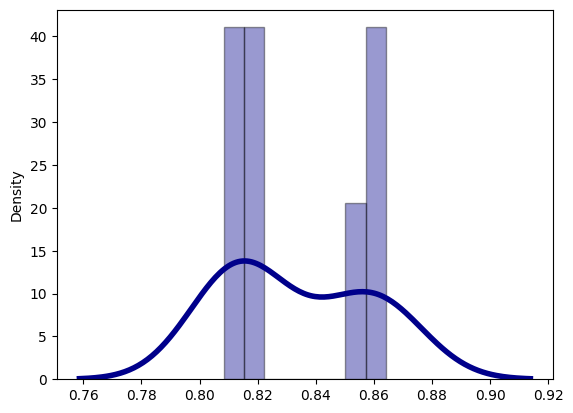

In [53]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

hit_rates = cross_val_score(model_rf, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_rf = hit_rates

### Neural Network

In [36]:
import pickle
filename = 'best_model_nn.sav'

if run_grid_search_nn == True:
  # Create the parameter grid
  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

  param_grid = {
                'learning_rate':['constant', 'invscaling', 'adaptive'],
                'solver':['lbfgs', 'sgd', 'adam'],
                'activation':['identity', 'logistic', 'tanh', 'relu'],
                'max_iter': [200,300,400],
                'alpha': [0.0001,0.0003],
                'hidden_layer_sizes':[1,2,3,4,5]
                }

  # Create a based model
  model_nn = MLPClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nn, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nn = grid_search.best_estimator_
  #save
  pickle.dump(model_nn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nn = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_nn)
y_pred_nn = model_nn.predict(X_test)



Parameters of best model:
MLPClassifier(activation='tanh', alpha=0.0003, hidden_layer_sizes=3,
              learning_rate='invscaling', max_iter=300)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWar

NN - Accuracy, precision and recall

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = y_pred_nn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)],
    'F1 score': [f1_score(y_test, y_pred)],
     'roc_auc':[roc_auc_score(y_test, y_pred)]

    }
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall,F1 score,roc_auc
0,0.742525,0.786765,0.688103,0.734134,0.744395


NN - Confusion matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


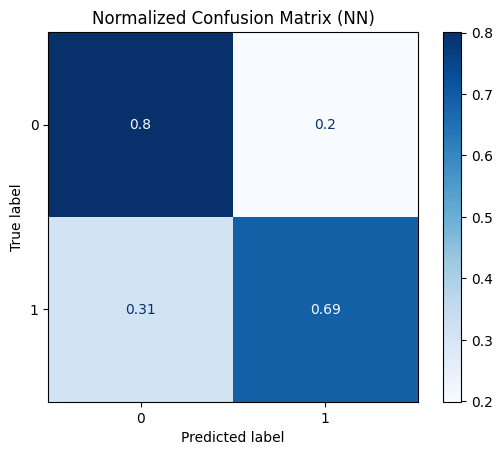

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model_nn,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (NN)")
plt.show()


NN - Statistical analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

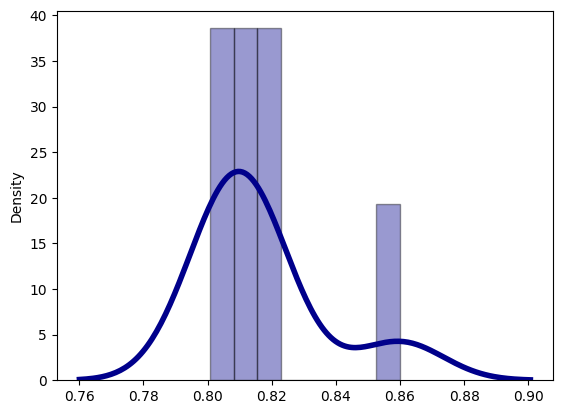

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns


# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=crossvalidation)

hit_rates = cross_val_score(model_nn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nn = hit_rates

In [21]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pickle
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

# Define the base estimator (MLPClassifier)
base_estimator = MLPClassifier(random_state=42)

# Initialize BalancedBaggingClassifier with the correct parameter name 'estimator'
model = BalancedBaggingClassifier(
    estimator=base_estimator,  # Correct parameter name
    random_state=42
)

# Define param_grid for BalancedBaggingClassifier
param_grid = {
    'n_estimators': [10],  # Try smaller ensemble first
    'bootstrap': [True],   # Test one option first
    'estimator__hidden_layer_sizes': [(50,)],  # Simpler architecture
    'estimator__alpha': [0.0001],  # Fewer regularization values
}

# Initialize GridSearchCV with the correct model
grid_search = GridSearchCV(
    estimator=model,  # Use the BalancedBagging model, not model_nn
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=3),  # Example: 3-fold CV
    n_jobs=3,
    verbose=2,
    scoring='roc_auc'
)

# Apply SMOTE resampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Save the trained model using pickle
filename = 'best_model_new_nn.sav'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {filename}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best model saved to best_model_new_nn.sav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
# Get the best model after grid search
model_nn = grid_search.best_estimator_
# Predict on the test set
y_pred_new_nn = model_nn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


y_pred = y_pred_new_nn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)],
    'F1 score': [f1_score(y_test, y_pred)],
     'roc_auc':[roc_auc_score(y_test, y_pred)]

    }
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys




,Accuracy,Precision,Recall,F1 score,roc_auc
0,0.749169,0.78777,0.70418,0.743633,0.750715


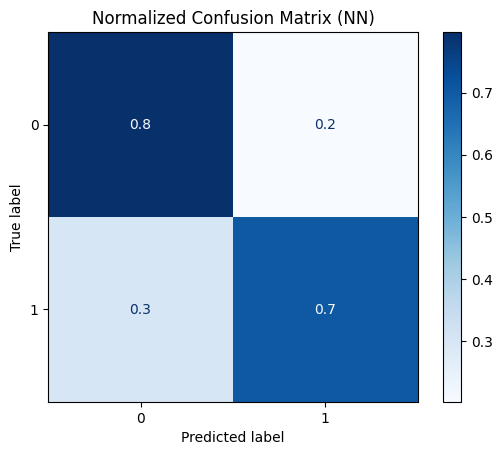

In [44]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
ConfusionMatrixDisplay.from_estimator(
    model_nn,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (NN)")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

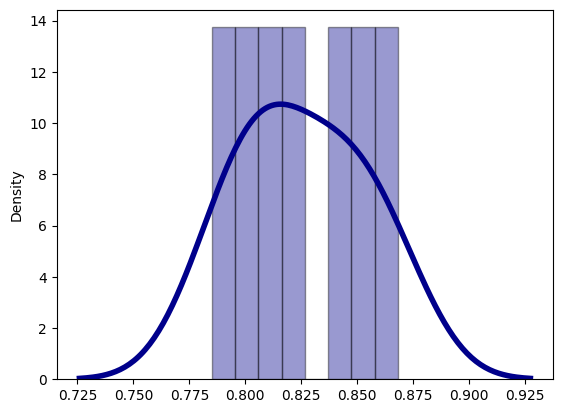

In [46]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

hit_rates = cross_val_score(model_nn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nn_new = hit_rates


In [54]:
print('rf',hit_rates_rf)
print ('nn',hit_rates_nn)
print ('new nn', hit_rates_nn_new)

rf [0.86409596 0.81621729 0.81263137 0.80842758 0.81863677 0.86137524
 0.85086578]
nn [0.81601903 0.81046788 0.80072065 0.81002903 0.80302272 0.85997398
 0.81723551]
new nn [0.84020619 0.8223632  0.80652587 0.80482434 0.78500651 0.86818136
 0.84976479]
[CV] END bootstrap=True, ccp_alpha=0.4, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, ccp_alpha=0.4, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, ccp_alpha=0.4, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, ccp_alpha=0.4, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, ccp_alpha=0.4, criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, n_estimators=200; total time=   0.2s
[CV] E

## - Models comparation;


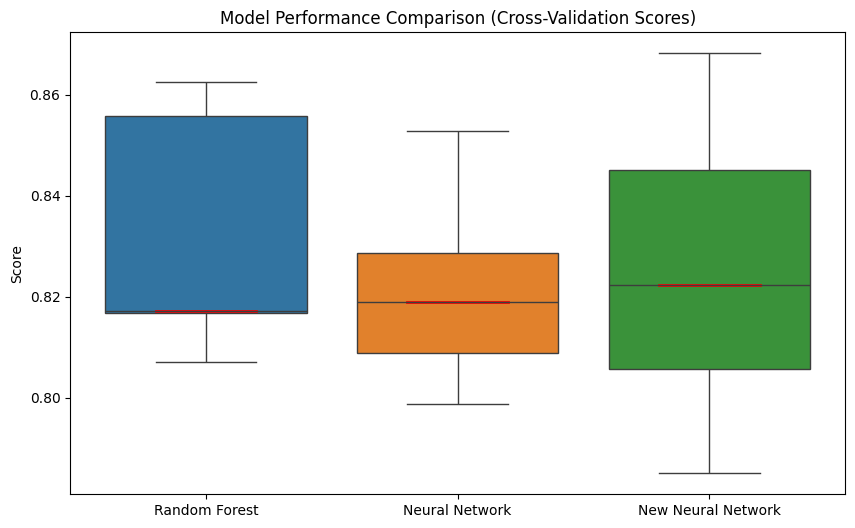

Random Forest Scores: [0.85785091 0.81691118 0.80702632 0.81673506 0.81723551 0.86247623
 0.85356821]
Neural Network Scores: [0.82751784 0.81899286 0.79871885 0.8123311  0.80542488 0.85286758
 0.82984686]
New Neural Network Scores: [0.84020619 0.8223632  0.80652587 0.80482434 0.78500651 0.86818136
 0.84976479]


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Combine data into a list for plotting
scores = [hit_rates_rf, hit_rates_nn, hit_rates_nn_new]
labels = ['Random Forest', 'Neural Network', 'New Neural Network']

# Compute medians
medians = [np.median(model_scores) for model_scores in scores]

# Create boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=scores, orient="v")

# Add red horizontal lines for medians
for i, median in enumerate(medians):
    plt.plot([i - 0.2, i + 0.2], [median, median], color='red', linewidth=2)

plt.xticks(np.arange(3), labels=labels)
plt.title("Model Performance Comparison (Cross-Validation Scores)")
plt.ylabel("Score")
plt.show()

# Printing the actual cross-validation scores for each model
print('Random Forest Scores:', hit_rates_rf)
print('Neural Network Scores:', hit_rates_nn)
print('New Neural Network Scores:', hit_rates_nn_new)


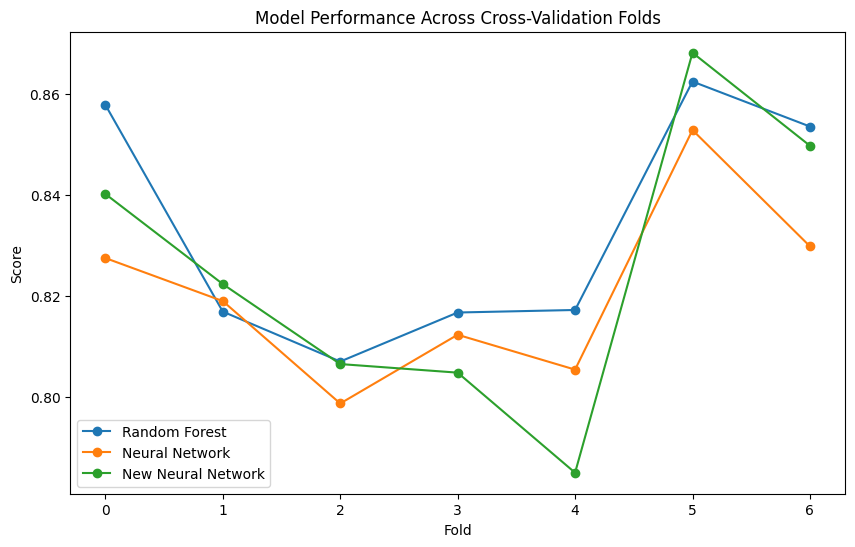

rf [0.85785091 0.81691118 0.80702632 0.81673506 0.81723551 0.86247623
 0.85356821]
nn [0.82751784 0.81899286 0.79871885 0.8123311  0.80542488 0.85286758
 0.82984686]
new nn [0.84020619 0.8223632  0.80652587 0.80482434 0.78500651 0.86818136
 0.84976479]


In [79]:
import matplotlib.pyplot as plt

# Assuming these variables hold the cross-validation scores


# Plot the scores across the cross-validation folds
plt.figure(figsize=(10, 6))
plt.plot(hit_rates_rf, label="Random Forest", marker='o')
plt.plot(hit_rates_nn, label="Neural Network", marker='o')
plt.plot(hit_rates_nn_new, label="New Neural Network", marker='o')

# Customize the plot
plt.title("Model Performance Across Cross-Validation Folds")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()

# Show the plot
plt.show()


print('rf', hit_rates_rf)
print('nn', hit_rates_nn)
print('new nn', hit_rates_nn_new)

Density


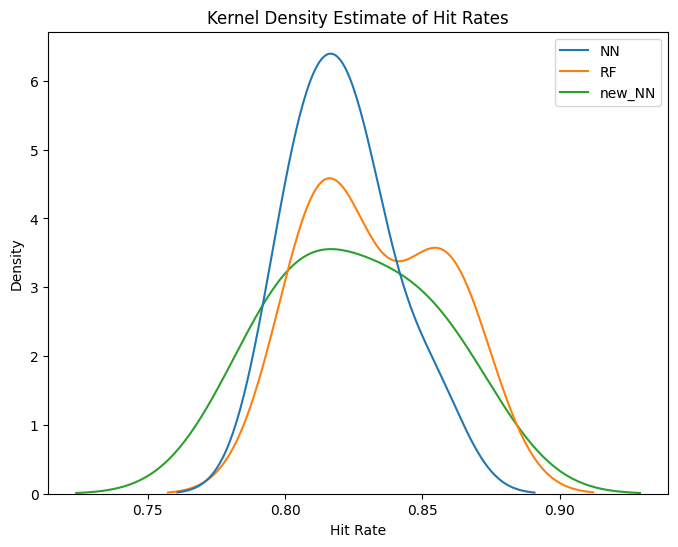

Friedman Test
FriedmanchisquareResult(statistic=np.float64(4.571428571428569), pvalue=np.float64(0.10170139230422694))


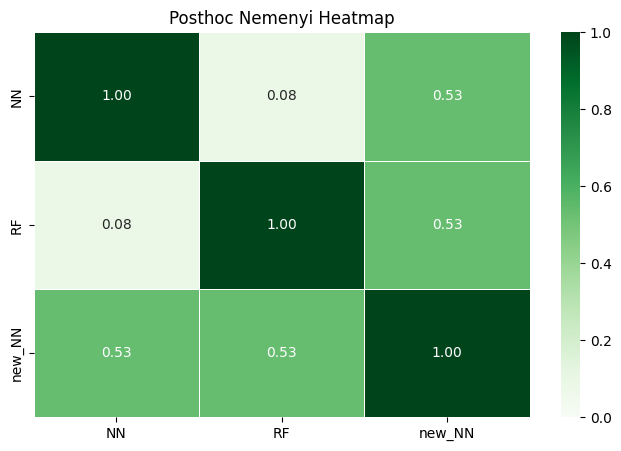

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp


print('Density')

# Prepare DataFrame
dt_tmp = {
    'NN': hit_rates_nn,
    'RF': hit_rates_rf,
    'new_NN': hit_rates_nn_new
}
dt_tmp = pd.DataFrame(dt_tmp)

# KDE Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=dt_tmp, legend=True, bw_method=0.7)
plt.title("Kernel Density Estimate of Hit Rates")
plt.xlabel("Hit Rate")
plt.ylabel("Density")
plt.show()

# Friedman Test
a = [hit_rates_nn, hit_rates_rf, hit_rates_nn_new]

print('Friedman Test')
print(friedmanchisquare(*a))

# Posthoc Nemenyi Test
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['NN', 'RF', 'new_NN']

# Heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(
    posthoc, vmin=0, vmax=1,
    xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens", linewidths=.5,
    annot=True, fmt='.2f'
)
plt.title("Posthoc Nemenyi Heatmap")
plt.show()


Density
[0.84020619, 0.8223632, 0.80652587, 0.80482434, 0.78500651, 0.86818136, 0.84976479]


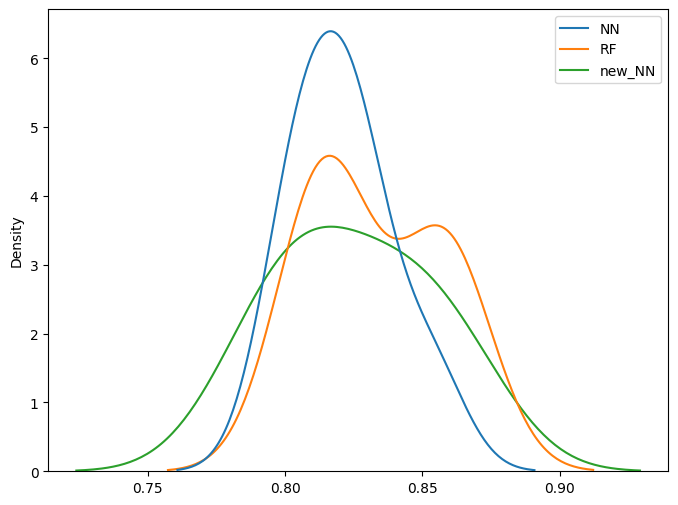

Friedman Test
FriedmanchisquareResult(statistic=np.float64(4.571428571428569), pvalue=np.float64(0.10170139230422694))


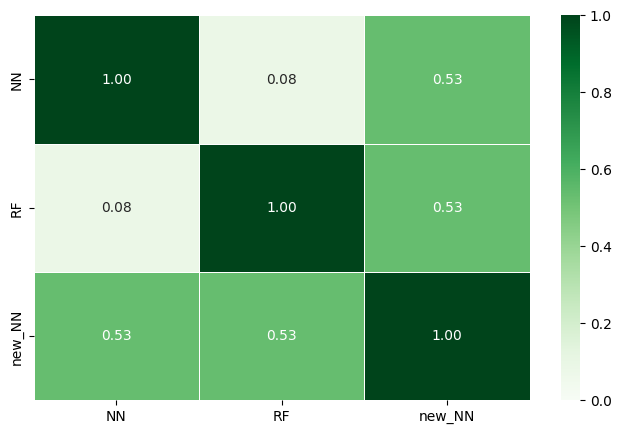

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

print('Density')
print(hit_rates_new_nn)

# Prepare DataFrame
dt_tmp = {
    'NN': hit_rates_nn,
    'RF': hit_rates_rf,
    'new_NN': hit_rates_new_nn
}
dt_tmp = pd.DataFrame(dt_tmp)

# KDE Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=dt_tmp, legend=True, bw_method=0.7)
plt.show()

# Friedman Test
a = [
    hit_rates_nn,
    hit_rates_rf,
    hit_rates_new_nn
]

print('Friedman Test')
print(friedmanchisquare(*a))

# Posthoc Nemenyi
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['NN', 'RF', 'new_NN']

# Heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(
    posthoc, vmin=0, vmax=1,
    xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens", linewidths=.5,
    annot=True, fmt='.2f'
)
plt.show()


## - Information Gain (Global);

Funções utilizadas

In [97]:



def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


################### 
    
###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain



[CV] END bootstrap=True, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50,), n_estimators=10; total time=   1.7s
[CV] END bootstrap=True, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50,), n_estimators=10; total time=   1.7s
[CV] END bootstrap=True, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50,), n_estimators=10; total time=   1.7s


Ganho de Informação - Ranque de atributos

In [99]:
data = pd.read_csv("dataset_pred2town_bel.csv", delimiter=";")

# Renaming columns for consistency
column_translation = {
    "mes_num_crb": "month_number",
    "quant_lesao_corporal_crb": "physical_injury",
    "quant_ameaca_crb": "threats",
    "quant_roubo_crb": "robbery",
    "quant_injuria_crb": "injury",
    "quant_furto_crb": "theft",
    "quant_lesao_no_transito_crb": "traffic_injury",
    "quant_dano_no_transito_crb": "traffic_damage",
    "quant_difamacao_crb": "defamation",
    "quant_homicidio_crb": "homicide",
    "quant_abandono_do_lar_crb": "abandonment_of_home",
    "quant_conflitos_vicinais_crb": "neighborhood_conflicts",
    "quant_conflitos_conjugais_crb": "marital_conflicts",
    "quant_fuga_do_lar_crb": "escape_from_home",
    "quant_estupro_de_vulneravel_crb": "rape_of_vulnerable_person",
    "quant_outros_fatos_atipicos_crb": "other_atypical_facts",
    "quant_roubo_de_veiculo_crb": "vehicle_robbery",
    "quant_estelionato_crb": "fraud",
    "quant_dano_crb": "damage",
    "quant_dano_civil_crb": "civil_damage",
    "quant_calunia_crb": "slander",
    "quant_conflitos_familiares_crb": "family_conflicts",
    "quant_trafico_de_drogas_crb": "drug_trafficking",
    "quant_vias_de_fato_crb": "physical_assault",
    "quant_apropriacao_indebita_crb": "embezzlement",
    "quant_agressao_fisica_crb": "physical_assault",
    "quant_receptacao_crb": "receiving_stolen_goods",
    "quant_estupro_crb": "rape",
    "quant_desaparecimento_de_pessoa_crb": "missing_person",
    "quant_tentativa_de_homicidio_crb": "attempted_homicide",
    "quant_poluicao_sonora_crb": "noise_pollution",
    "quant_outras_fraudes_crb": "other_frauds",
    "quant_desobediencia_crb": "disobedience",
    "quant_desacato_crb": "contempt_of_authority",
    "quant_perturbacoes_da_tranquilidade_crb": "disturbance_of_the_peace",
    "Class": "class"
}

# Renaming columns
data = data.rename(columns=column_translation)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering m

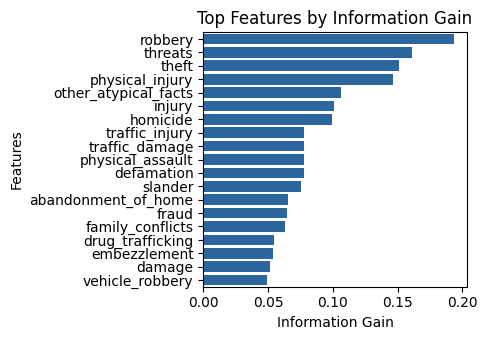

In [109]:
# Features and target
x_features_names = [col for col in data.columns if col != 'class']
y_feature_name = 'class'

# InfoGain calculation
def InfoGain(df, feature, target):
    return mutual_info_classif(df[[feature]], df[target], discrete_features=True)[0]

# Calculate and sort Information Gain
information_gain = pd.Series(
    [InfoGain(data, feature, y_feature_name) for feature in x_features_names],
    index=x_features_names
).sort_values(ascending=False)

# Plot top 20 attributes
att_count = 20
plt.figure(figsize=(5, 3.5))
sns.barplot(
    x=information_gain.iloc[:att_count],
    y=information_gain.index[:att_count],
    color=(0.1, 0.4, 0.7, 0.6)
)
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Top Features by Information Gain')
plt.tight_layout()
plt.show()

## - Attribute importance (Global);

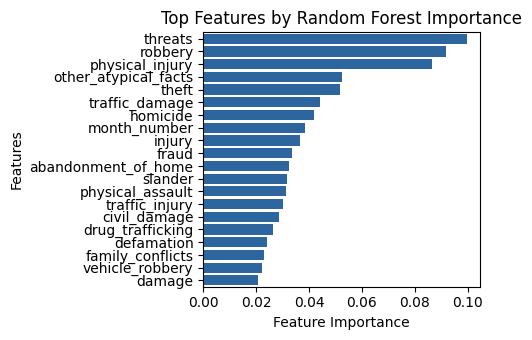

In [111]:
# Extracting feature importance from the Random Forest model
feature_importance = pd.Series(model_rf.feature_importances_, index=x_features_names).sort_values(ascending=False)

# Add feature ranking to a DataFrame (assuming df_Pred2Town_feature_rank exists)
df_Pred2Town_feature_rank['feature_importance_rf'] = feature_importance.index[:]

# Plot top features by importance
plt.figure(figsize=(5, 3.5))
sns.barplot(
    x=feature_importance[0:att_count],
    y=feature_importance.index[0:att_count],
    color=(0.1, 0.4, 0.7, 0.6)
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Features by Random Forest Importance')
plt.tight_layout()
plt.show()



In [61]:
# Load your model again and inspect which features were used in training
import pandas as pd
from joblib import load

# Load your pre-trained model
model = load("best_model_nn.sav")

# Inspect the model's first layer to understand input shape
print("Model input layer shape:", model.coefs_[0].shape)

# Load the data for prediction
data = pd.read_csv("dataset_pred2town_bel.csv", delimiter=";")

# Check the column names of the input data
print("Input data columns:", data.columns)

# Check the exact number of features the model expects
expected_features = model.coefs_[0].shape[0]  # This should give us the number of input features

# Let's extract the first 'expected_features' columns from the dataset
input_data = data.iloc[:, :expected_features]

# Ensure correct shape and feature alignment
print("Input data shape after feature selection:", input_data.shape)

# Now, make a prediction
prediction = model.predict(input_data)

# Display the prediction result
print("Model prediction:", prediction)


Model input layer shape: (35, 3)
Input data columns: Index(['mes_num_crb', 'quant_lesao_corporal_crb', 'quant_ameaca_crb',
       'quant_roubo_crb', 'quant_injuria_crb', 'quant_furto_crb',
       'quant_lesao_no_transito_crb', 'quant_dano_no_transito_crb',
       'quant_difamacao_crb', 'quant_homicidio_crb',
       'quant_abandono_do_lar_crb', 'quant_conflitos_vicinais_crb',
       'quant_conflitos_conjugais_crb', 'quant_fuga_do_lar_crb',
       'quant_estupro_de_vulneravel_crb', 'quant_outros_fatos_atipicos_crb',
       'quant_roubo_de_veiculo_crb', 'quant_estelionato_crb', 'quant_dano_crb',
       'quant_dano_civil_crb', 'quant_calunia_crb',
       'quant_conflitos_familiares_crb', 'quant_trafico_de_drogas_crb',
       'quant_vias_de_fato_crb', 'quant_apropriacao_indebita_crb',
       'quant_agressao_fisica_crb', 'quant_receptacao_crb',
       'quant_estupro_crb', 'quant_desaparecimento_de_pessoa_crb',
       'quant_tentativa_de_homicidio_crb', 'quant_poluicao_sonora_crb',
       'qu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWar

In [62]:
# Load the dataset
data = pd.read_csv("dataset_pred2town_bel.csv", delimiter=";")

# Remove the target column 'Class' from the input data
input_data = data.drop(columns=['Class'])

# Verify the shape of the input data
print("Input data shape after excluding target column:", input_data.shape)

# Check if the number of features matches what the model expects (36 features)
if input_data.shape[1] == 36:
    # Make a prediction with the adjusted input data
    prediction = model.predict(input_data)
    print("Model prediction:", prediction)
else:
    print(f"Input data has {input_data.shape[1]} features, but model expects 36.")


Input data shape after excluding target column: (2004, 35)
Input data has 35 features, but model expects 36.
